This file contains all models we tried. We are not sure if we picked models correctly, how evaluetion and hyperparameter tuning works. We decided to have them all in this file and submit anyway. It shows our logic and approach to modelling.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [24]:
# importing the initial ULEZ dataset
in_ulez_data = pd.read_csv('/content/drive/MyDrive/ULEZ/in_ulez_clean.csv')
in_ulez_data.head()

,site_name,site_borough,site_code,latitude,longitude,site_type,date,NO2_value,prov_rat,avg_temperature,min_temperature,max_temperature,precipitation,snow_depth,avg_wind_direction,avg_wind_speed,avg_air_pressure
0,Bloomsbury,Camden,BL0,51.522287,-0.125848,Urban Background,2017-01-01,24.5,R,5.9,4.0,9.4,0.3,0.0,241.0,14.0,1018.6
1,Bloomsbury,Camden,BL0,51.522287,-0.125848,Urban Background,2017-02-01,34.5,R,10.5,8.0,12.0,3.0,0.0,180.0,13.3,1006.5
2,Bloomsbury,Camden,BL0,51.522287,-0.125848,Urban Background,2017-03-01,46.9,R,8.0,6.0,10.0,1.5,0.0,248.0,20.0,998.2
3,Bloomsbury,Camden,BL0,51.522287,-0.125848,Urban Background,2017-04-01,45.8,R,12.8,11.0,15.0,0.3,0.0,212.0,15.6,1009.4
4,Bloomsbury,Camden,BL0,51.522287,-0.125848,Urban Background,2017-05-01,59.6,R,11.2,10.0,13.0,1.5,0.0,117.0,16.1,1004.2


In [25]:
# converting the date format to datetime
in_ulez_data['date'] = pd.to_datetime(in_ulez_data['date'])

# **Modelling**

We wanted to use regression techniques to predict the 'NO2_value'. Given the nature of our dataset, we used the following regression models:

**Linear Regression**: A simple model to start with, assuming a linear relationship between the features and the target.

**Random Forest Regression**: A more complex model that can capture non-linear relationships and interactions between features.

**Gradient Boosting Regression**: Another ensemble method that builds multiple weak models (typically decision trees) to create a strong predictive model.

**Support Vector Regression**: This model can capture complex relationships by transforming data into a higher-dimensional space.

**ElasticNet Regression**: A combination of Lasso and Ridge regression, which can handle both feature selection and regularization.

**Metrics:**

Mean Absolute Error (MAE)

Mean Squared Error (MSE)

Root Mean Squared Error (RMSE)

R-squared (R2)

In [26]:
from sklearn.model_selection import train_test_split

# preprocessing
# defining the ULEZ introduction and expansion dates
ulez_introduction = '2019-04-08'
ulez_expansion = '2021-10-25'

# categorising data based on ULEZ introduction and expansion dates
in_ulez_data['ulez_category'] = np.where(in_ulez_data['date'] < ulez_introduction, 'Before ULEZ',
                               np.where(in_ulez_data['date'] <= ulez_expansion, 'Initial ULEZ', 'After ULEZ expanded'))

# dropping column prov_rat
in_ulez_data = in_ulez_data.drop('prov_rat', axis=1)

# extracting additional features from the 'date' column
in_ulez_data['year'] = in_ulez_data['date'].dt.year
in_ulez_data['month'] = in_ulez_data['date'].dt.month
in_ulez_data['day'] = in_ulez_data['date'].dt.day

# dropping column date
in_ulez_data = in_ulez_data.drop('date', axis=1)

# converting categorical columns to one-hot encoded features
categorical_columns = ['site_name', 'site_borough', 'site_code', 'site_type', 'ulez_category']
data_encoded = pd.get_dummies(in_ulez_data, columns=categorical_columns, drop_first=True)

# splitting the data into features (X) and target (y)
X = data_encoded.drop('NO2_value', axis=1)
y = data_encoded['NO2_value']

# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### **Linear Regression**

MAE: 13.55087251495029
MSE: 308.9893223148414
RMSE: 17.578092112480277
R2: 0.5665650494111707


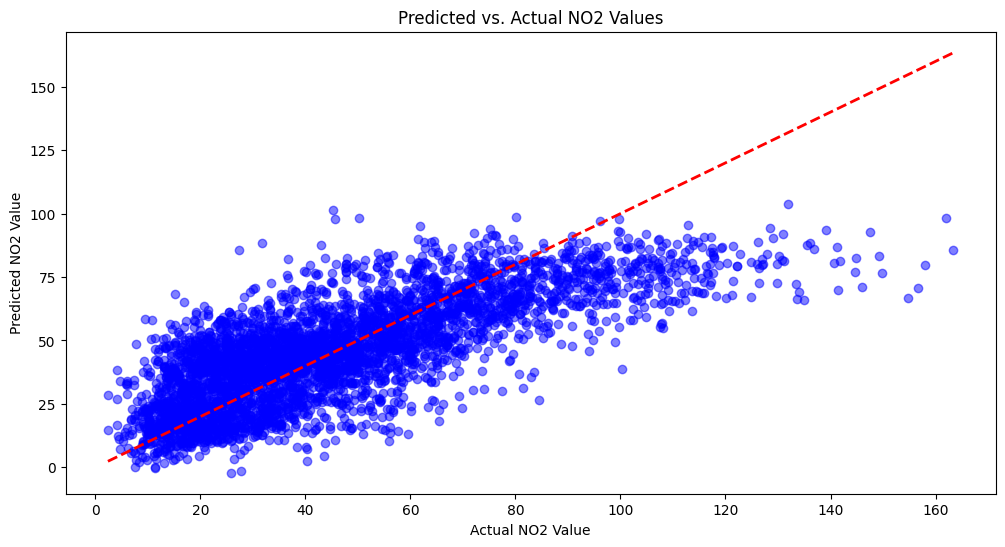

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# initialising and training a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# making predictions on the test set
predictions = model.predict(X_test)

# calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'MAE: {mae}')

# calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

# calculating RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'RMSE: {rmse}')

# calculating R-squared (R2)
r2 = r2_score(y_test, predictions)
print(f'R2: {r2}')

# Visualising predicted vs. actual values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual NO2 Value')
plt.ylabel('Predicted NO2 Value')
plt.title('Predicted vs. Actual NO2 Values')
plt.show()

##### **Random Forest Regression**

MAE: 7.573160283068154
MSE: 114.946368390111
RMSE: 10.721304416446303
R2: 0.8387589152586711


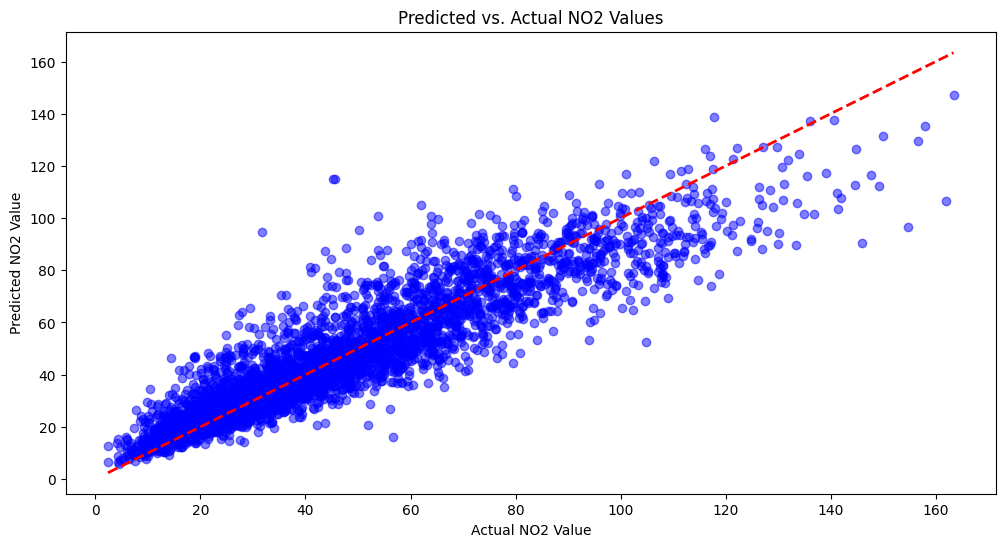

In [28]:
from sklearn.ensemble import RandomForestRegressor

# initialising and training a Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# making predictions on the test set
predictions = model.predict(X_test)

# calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'MAE: {mae}')

# calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

# calculating RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'RMSE: {rmse}')

# calculating R-squared (R2)
r2 = r2_score(y_test, predictions)
print(f'R2: {r2}')

# visualising predicted vs. actual values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual NO2 Value')
plt.ylabel('Predicted NO2 Value')
plt.title('Predicted vs. Actual NO2 Values')
plt.show()

##### **Gradient Boosting Regression**

MAE: 10.535002694642023
MSE: 194.72586678382
RMSE: 13.954421047962542
R2: 0.726848177744432


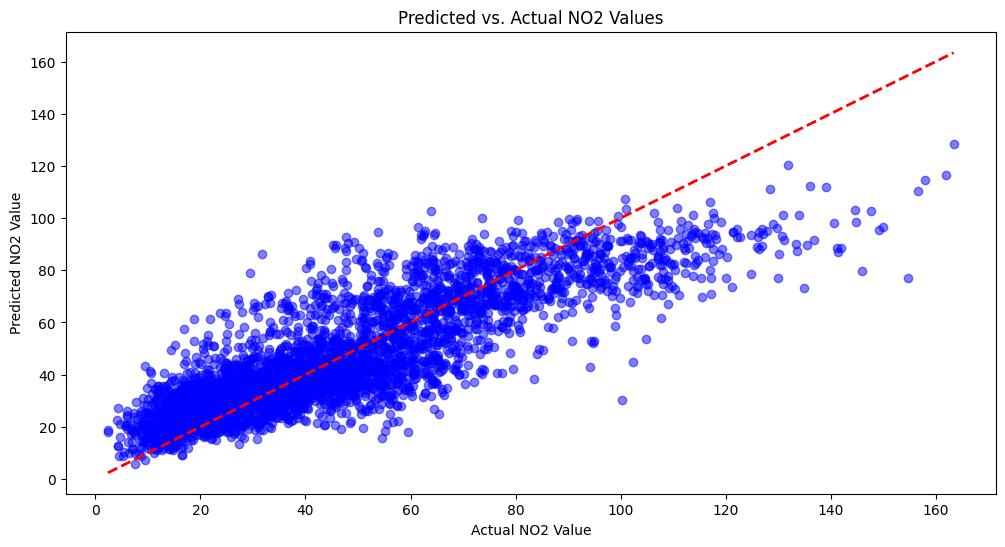

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

# initialising and training a Gradient Boosting Regression model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# making predictions on the test set
predictions = model.predict(X_test)

# calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'MAE: {mae}')

# calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

# calculating RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'RMSE: {rmse}')

# calculating R-squared (R2)
r2 = r2_score(y_test, predictions)
print(f'R2: {r2}')

# visualising predicted vs. actual values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual NO2 Value')
plt.ylabel('Predicted NO2 Value')
plt.title('Predicted vs. Actual NO2 Values')
plt.show()

##### **Support Vector Regression**

MAE: 13.652769218094901
MSE: 315.62139102282634
RMSE: 17.765736433450382
R2: 0.5572619111952224


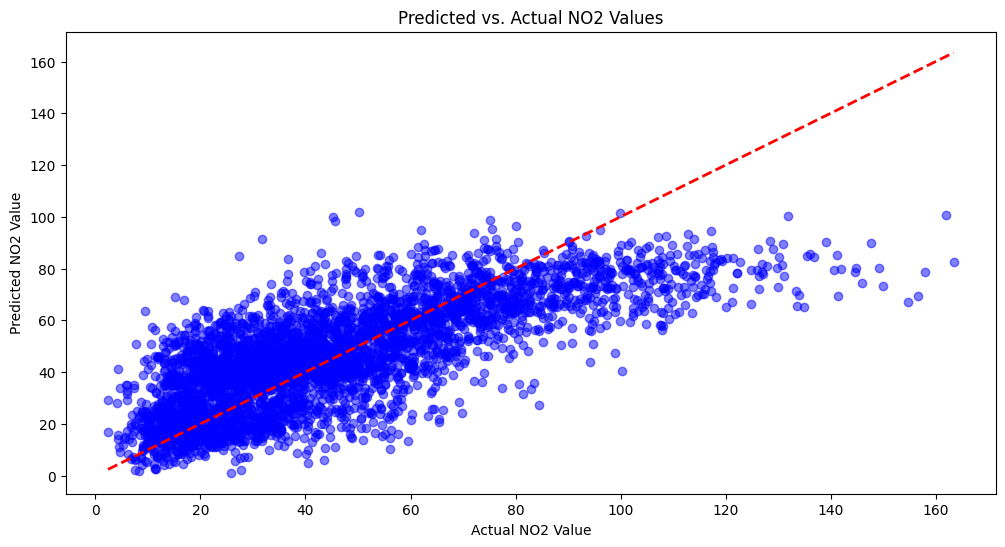

In [30]:
from sklearn.svm import SVR

# initialising and training a Support Vector Regression
model = SVR(kernel='linear')
model.fit(X_train, y_train)

# making predictions on the test set
predictions = model.predict(X_test)

# calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'MAE: {mae}')

# calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

# calculating RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'RMSE: {rmse}')

# calculating R-squared (R2)
r2 = r2_score(y_test, predictions)
print(f'R2: {r2}')

# visualising predicted vs. actual values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual NO2 Value')
plt.ylabel('Predicted NO2 Value')
plt.title('Predicted vs. Actual NO2 Values')
plt.show()

##### **ElasticNet Regression**

MAE: 13.600693335194086
MSE: 312.7163375767587
RMSE: 17.683787421724983
R2: 0.5613369765969038


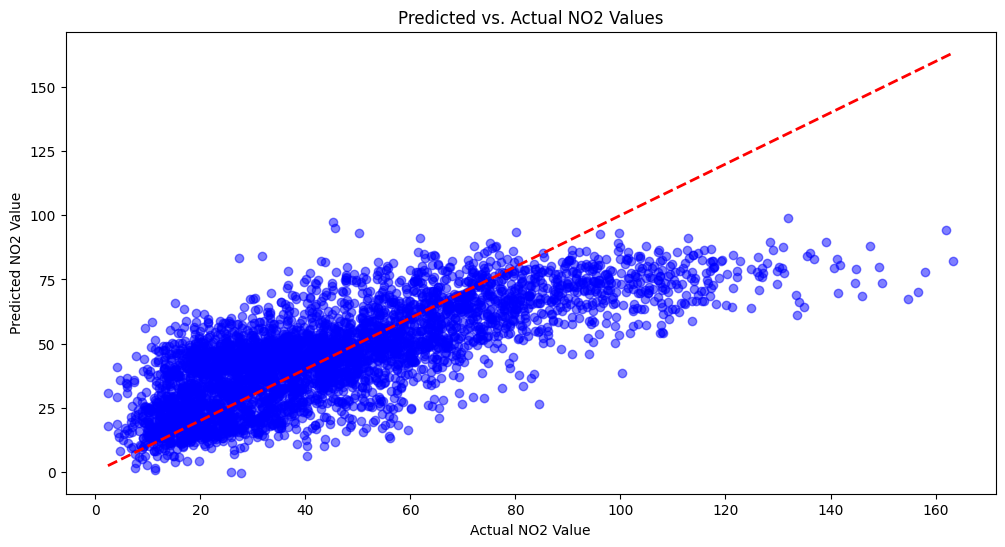

In [31]:
from sklearn.linear_model import ElasticNet

# initialising and training an ElasticNet Regression model
model = ElasticNet(alpha=0.1, l1_ratio=0.5)
model.fit(X_train, y_train)

# making predictions on the test set
predictions = model.predict(X_test)

# calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'MAE: {mae}')

# calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

# calculating RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'RMSE: {rmse}')

# calculating R-squared (R2)
r2 = r2_score(y_test, predictions)
print(f'R2: {r2}')

# visualising predicted vs. actual values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual NO2 Value')
plt.ylabel('Predicted NO2 Value')
plt.title('Predicted vs. Actual NO2 Values')
plt.show()